In [7]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [8]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.11MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.70MB/s]


In [9]:
len(dataset)

60000

In [10]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

label: 5


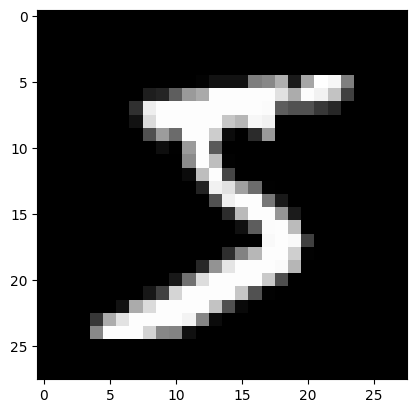

In [12]:
image, label = dataset[0]
plt.imshow(image , cmap='gray')
print('label:', label)

In [13]:
import torchvision.transforms as transforms

In [14]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [15]:
img_tensor, label = dataset[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


In [16]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


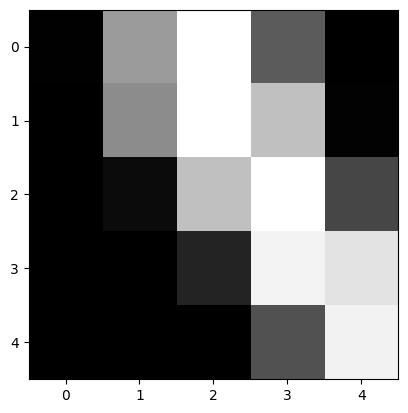

In [17]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [18]:
from torch.utils.data import random_split

train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)



In [20]:
import torch.nn as nn

input_size=28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0019,  0.0231,  0.0176,  ...,  0.0277,  0.0211,  0.0091],
        [ 0.0169, -0.0352, -0.0092,  ...,  0.0117,  0.0043,  0.0127],
        [ 0.0163, -0.0030,  0.0010,  ...,  0.0347, -0.0245, -0.0231],
        ...,
        [ 0.0088, -0.0256,  0.0196,  ..., -0.0065,  0.0133,  0.0210],
        [-0.0001,  0.0284,  0.0021,  ...,  0.0191, -0.0356, -0.0276],
        [-0.0334, -0.0232, -0.0275,  ...,  0.0153,  0.0221,  0.0238]],
       requires_grad=True)

In [22]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0109, -0.0129, -0.0074, -0.0225, -0.0048, -0.0008, -0.0056,  0.0133,
        -0.0352, -0.0137], requires_grad=True)

In [24]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([1, 4, 7, 2, 0, 6, 1, 7, 5, 7, 1, 1, 8, 1, 6, 3, 1, 3, 1, 9, 7, 4, 0, 3,
        1, 2, 5, 8, 3, 9, 3, 6, 3, 8, 0, 1, 0, 7, 0, 0, 6, 6, 4, 0, 6, 6, 9, 8,
        1, 2, 4, 8, 4, 0, 6, 4, 5, 5, 5, 6, 5, 9, 1, 6, 6, 1, 0, 4, 4, 3, 7, 0,
        4, 7, 6, 6, 8, 1, 0, 1, 6, 1, 2, 9, 9, 0, 5, 3, 7, 4, 5, 3, 2, 1, 1, 8,
        6, 5, 6, 9, 8, 6, 3, 3, 5, 1, 8, 4, 9, 9, 1, 0, 8, 8, 6, 7, 6, 6, 3, 1,
        4, 4, 3, 0, 1, 0, 4, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [25]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [26]:
class MnistModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
       xb = xb.reshape(-1,784)
       out = self.linear(xb)
       return out

model = MnistModel()


In [27]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [28]:
for images, labels in train_loader:
   outputs = model(images)
   break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 2.0041e-01,  2.5475e-01,  5.5448e-02, -3.9600e-01,  5.9418e-04,
         -5.3055e-02,  2.1968e-02,  3.6784e-02,  9.1761e-03, -3.1618e-01],
        [ 3.6737e-01,  1.3948e-01,  2.1770e-01, -9.6539e-02,  4.0004e-01,
          3.1390e-01, -1.9734e-01,  1.1586e-01, -2.3074e-01, -6.5279e-01]])


In [29]:
import torch.nn.functional as F

In [30]:
outputs[:2]

tensor([[ 2.0041e-01,  2.5475e-01,  5.5448e-02, -3.9600e-01,  5.9418e-04,
         -5.3055e-02,  2.1968e-02,  3.6784e-02,  9.1761e-03, -3.1618e-01],
        [ 3.6737e-01,  1.3948e-01,  2.1770e-01, -9.6539e-02,  4.0004e-01,
          3.1390e-01, -1.9734e-01,  1.1586e-01, -2.3074e-01, -6.5279e-01]],
       grad_fn=<SliceBackward0>)

In [31]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities:\n", probs[:2].data)

print("Sum: " , torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1223, 0.1292, 0.1058, 0.0674, 0.1002, 0.0949, 0.1023, 0.1039, 0.1010,
         0.0730],
        [0.1329, 0.1058, 0.1144, 0.0836, 0.1373, 0.1260, 0.0756, 0.1034, 0.0731,
         0.0479]])
Sum:  1.0000001192092896


In [32]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 4, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 5, 1, 0, 5, 0, 5, 0,
        0, 4, 2, 2, 5, 1, 1, 1, 5, 1, 5, 1, 2, 0, 4, 0, 0, 0, 5, 1, 0, 0, 1, 6,
        0, 4, 0, 1, 1, 0, 2, 5, 5, 5, 1, 2, 1, 6, 7, 1, 1, 0, 4, 0, 1, 0, 1, 6,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 2, 5, 0, 1, 2, 4, 4, 5, 0, 2, 2, 1, 1, 5, 0, 1, 0, 5, 0,
        5, 2, 8, 1, 5, 1, 0, 5])
tensor([0.1292, 0.1373, 0.1235, 0.1443, 0.1203, 0.1433, 0.1184, 0.1525, 0.1357,
        0.1164, 0.1218, 0.1252, 0.1254, 0.1187, 0.1338, 0.1259, 0.1282, 0.1301,
        0.1418, 0.1142, 0.1515, 0.1529, 0.1552, 0.1350, 0.1263, 0.1302, 0.1216,
        0.1492, 0.1524, 0.1222, 0.1208, 0.1271, 0.1134, 0.1288, 0.1343, 0.1183,
        0.1198, 0.1522, 0.1287, 0.1682, 0.1354, 0.1290, 0.1263, 0.1334, 0.1189,
        0.1301, 0.1319, 0.1298, 0.1375, 0.1415, 0.1253, 0.1207, 0.1324, 0.1330,
        0.1365, 0.1418, 0.1483, 0.1272, 0.1316, 0.1299, 0.1226, 0.1341, 0.1140,
       